# Plotting with pandas

It is time to learn how to plot with our favorite data wrangling tool : pandas 🐼.

We will be using the open data powering https://www.rte-france.com/eco2mix website. 

The pre-processing of the data has been already done for you. All you need is to learn how read pickles from pandas!

![pickles](https://static.wikia.nocookie.net/rickandmorty/images/4/41/Pickle_rick_transparent_edgetrimmed.png)


## Exercise - setting up our (plotting) environment

In [1]:
# load pandas, matplotlib and setup your environment for bigger figures by default (check matplotlib's "rcParams")
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
[k for k in plt.rcParams.keys() if 'figsize' in k]

['figure.figsize']

In [3]:
# plt.style.use('Solarize_Light2')
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 6)

## Exercise : loading the data from a pickle file

In [4]:
# Load from the pickle file eco2mix
df = pd.read_pickle("data/eco2mix.pkl")
df.sample(10) # take 10 samples at random

,Périmètre,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
DateTime,,,,,,,,,,
2015-03-27 01:45:00,Hauts-de-France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-19 23:15:00,Nouvelle-Aquitaine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-22 16:15:00,PACA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-14 02:45:00,PACA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-06 11:15:00,Ile-de-France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-07 21:00:00,Auvergne-Rhône-Alpes,6459.0,54.0,7241.0,21.0,8.0,4255.0,-7.0,98.0,-5211.0
2018-04-06 14:30:00,Normandie,3288.0,217.0,7452.0,339.0,84.0,20.0,NaN,45.0,-4870.0
2013-03-12 12:45:00,PACA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-24 17:45:00,Grand-Est,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plotting with Matplotlib


##  Exercise -  Pie chart 

Choose a year in the data, and plot the share for each of the different energy sources.

0:Périmètre
1:Consommation
2:Thermique
3:Nucléaire
4:Eolien
5:Solaire
6:Hydraulique
7:Pompage
8:Bioénergies
9:Ech. physiques


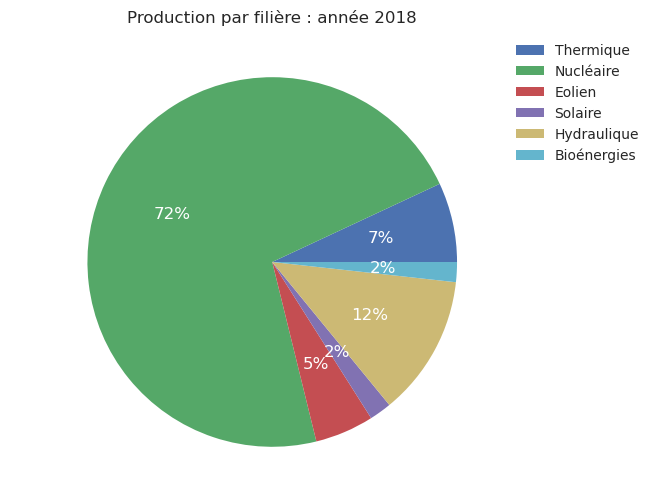

In [5]:
# Choose a year (ex: 2018) and plot the share that each of the different energy sources has in the total energy production:


# store the columns of interest in a variable:
[print(f"{i}:{column}") for i,column in enumerate(df.columns)]
production = [
    "Thermique",
    "Nucléaire",
    "Eolien",
    "Solaire",
    "Hydraulique",
    "Bioénergies",
]

# filter the original dataframe and keep only what's of interest:
df_production_2018 = df[production].loc[df[production].index.year==2018]

# quickly plot the results directly from the Pandas dataframe (very usefull during the data exploration phase!)
df_production_2018.sum().plot(
    kind="pie",
    title="Production par filière : année 2018",
    autopct='%.0f%%',
    textprops={'color':"w", 'size':12}
)

# further customization (if required) should be carried out via the Pyplot or artist interface of Matplotlib:
plt.legend(bbox_to_anchor=(1,1), loc="upper left") # position the legend in the upper right corner of the figure's axes


plt.show()

## Exercise :  Horizontal Bar

Use a horizontal bar chart instead of a pie to represent the previous data

_Tip: When possible, try to replace pie charts with horizontal bar_

<Axes: >

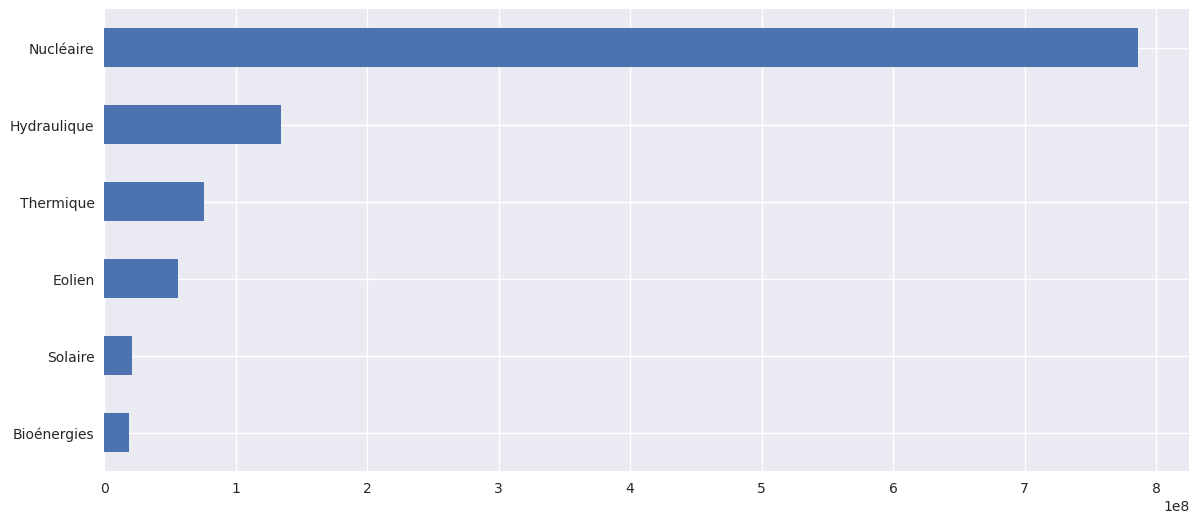

In [6]:
# When thinking about pie charts, give a try to horizontal bars.

df_production_2018.sum().sort_values().plot(kind="barh")

## Exercise : Area chart

Go ahead and explore trends in the evolution of the energy production with the help of an area chart

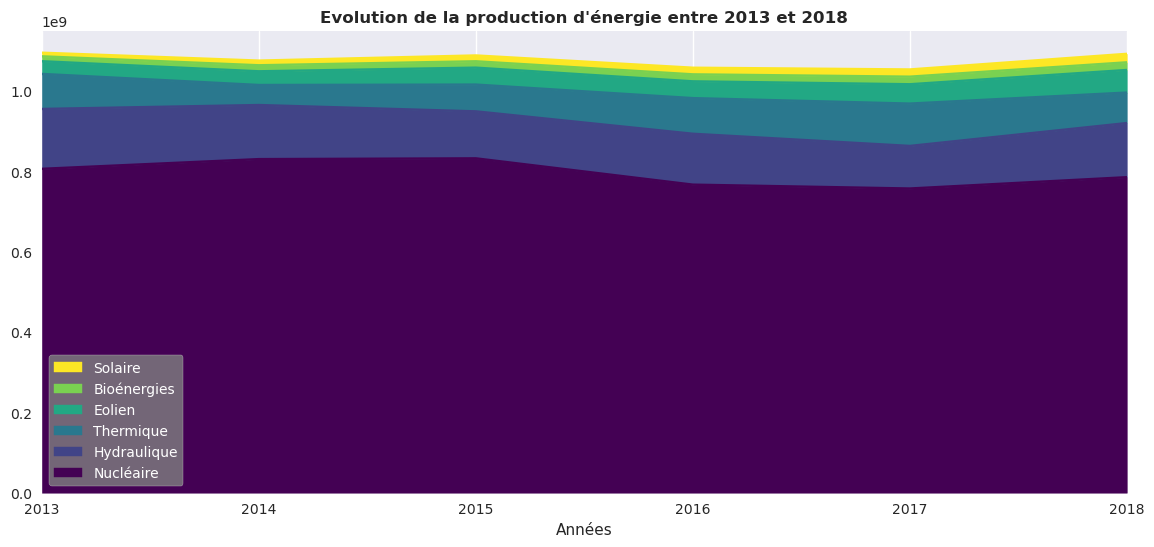

In [7]:
# Explore trends

df_production = df[production].resample("y").sum()

# sort columns from the lowest to the highest source of energy production 
columns_sorted = df_production.sum().sort_values(ascending=False).index
df_production = df_production[columns_sorted]

df_production.plot(kind="area", colormap="viridis")

plt.xlabel("Années")
plt.title("Evolution de la production d'énergie entre 2013 et 2018", fontweight="bold")
plt.legend(reverse=True, labelcolor="w", frameon=True, facecolor="grey")

plt.show()

## Exercise : Scatter Plot

Scatter plots are helpful to put in evidence relationships between two variables. Can you find a data relationships and make it visible with a plot ?

_Bonus: try Seaborn's joint plots_

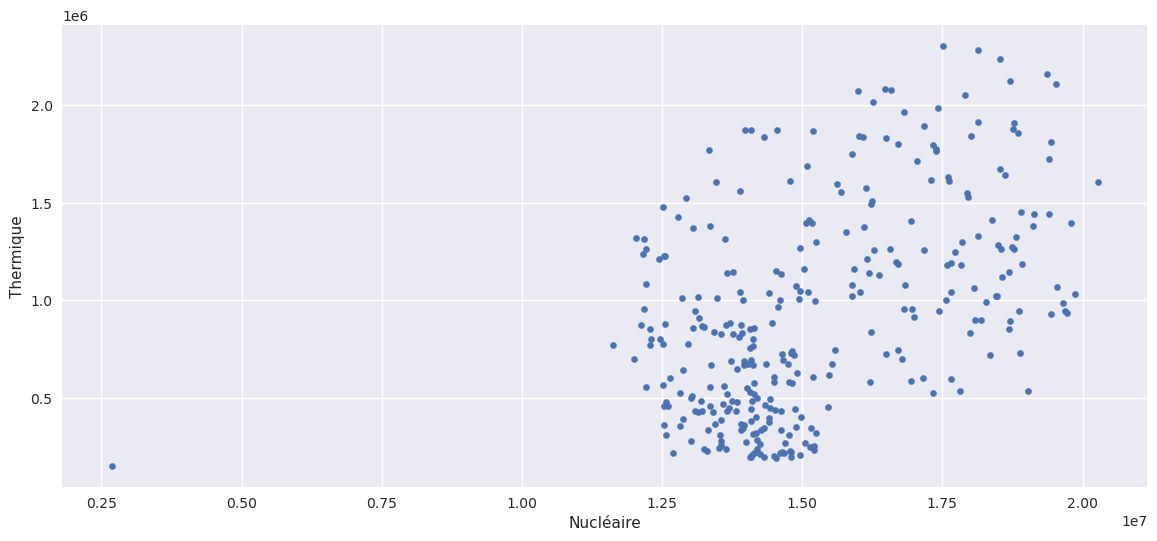

In [8]:
# Explore relationships between variables with a scatter plot

# formulate an hypothesis:
# ex: when the production of nuclear energy is decreasing, the production of thermic energy increases

x = "Nucléaire"
y = "Thermique"

# create a new dataframe:
# - drop rows containing NaNs
# - resample the data per week
nuclear_vs_thermal = df[[x, y]].dropna().resample("w").sum()

nuclear_vs_thermal.plot(kind="scatter", x=x, y=y)

plt.show()

In [9]:
# let's use the amazing Seaborn library to plot even more insightfull scatter plots:
import seaborn as sns # make sure you installed the library with pip or conda!

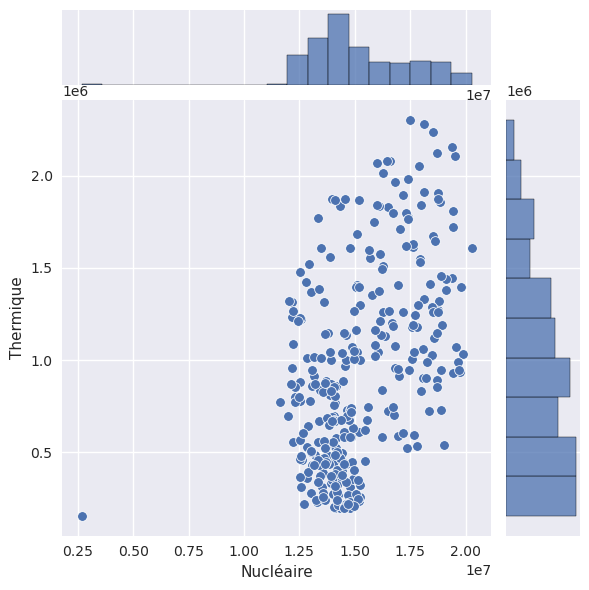

In [10]:
# create a joint plot using Seaborn:
sns.jointplot(
    x=nuclear_vs_thermal['Nucléaire'],
    y=nuclear_vs_thermal['Thermique']
    );

/nix/store/zgmwh5rndx3jpdpggddgaifh03mbqmv8-python3-3.10.12-env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


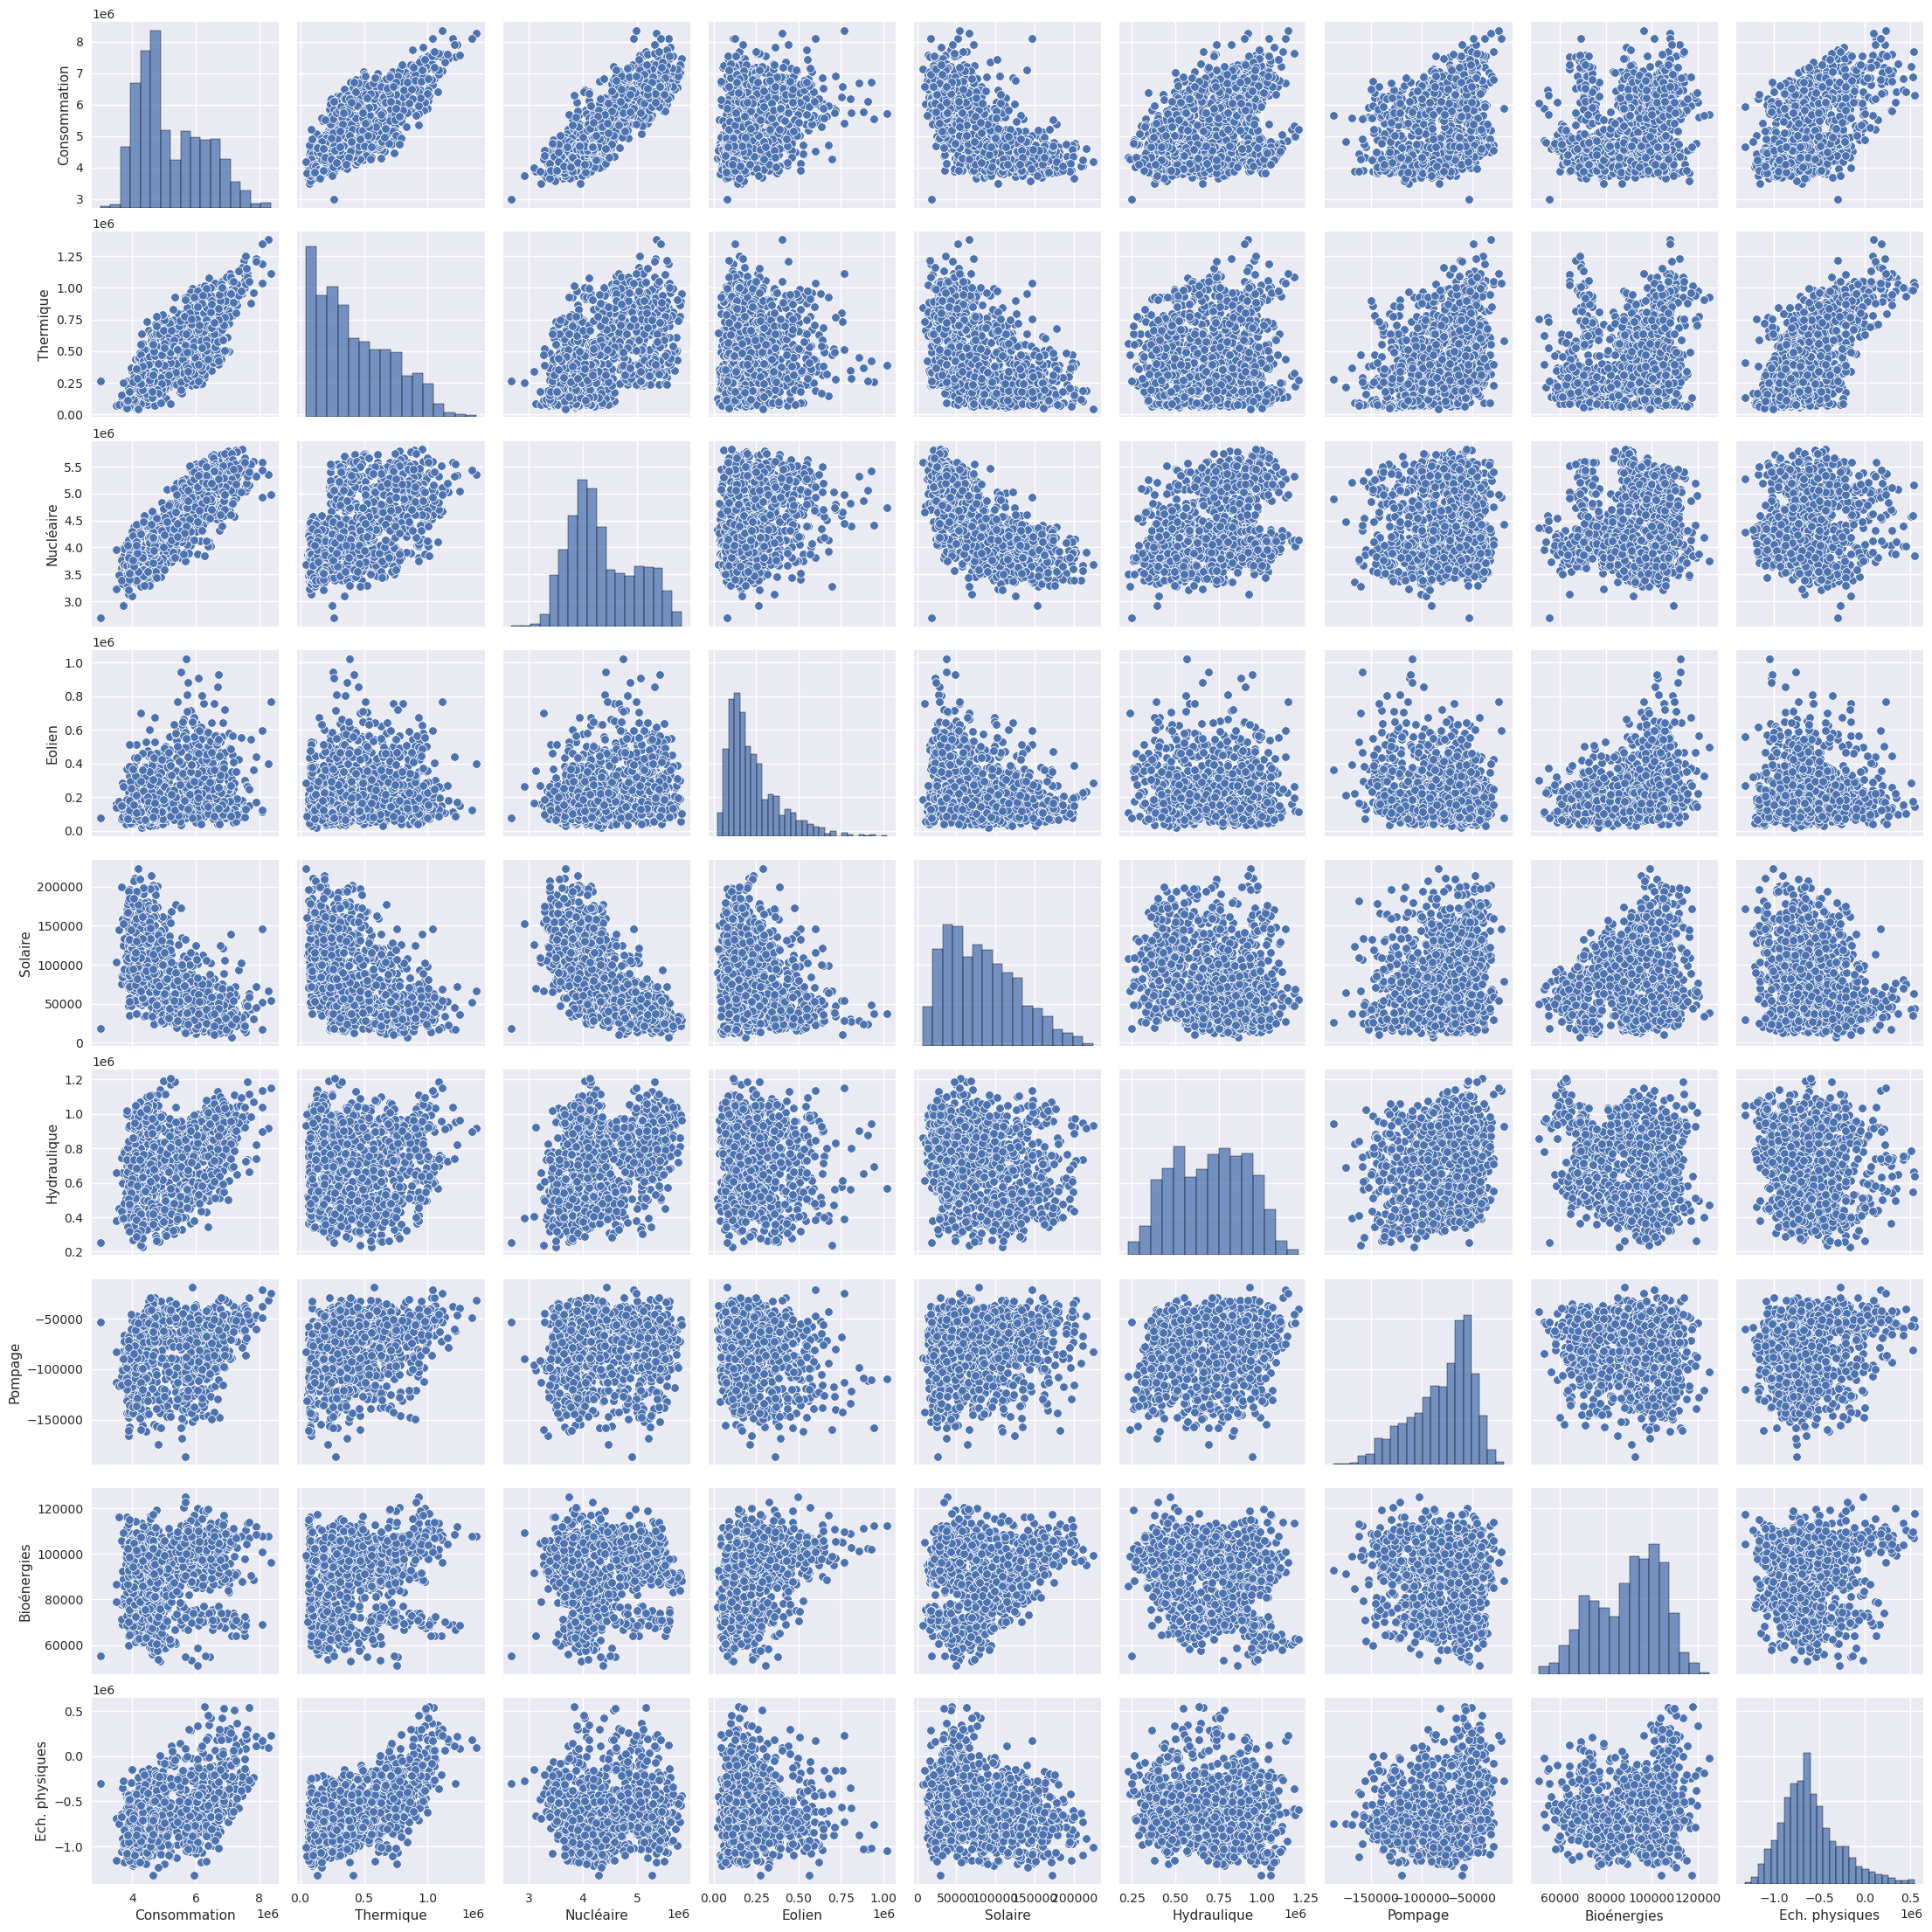

In [11]:
# You might also want to try out the pairplot:

# we'll use the initial dataframe for this, removing just the "Périmètre" column since it contains categorical data:
df_resampled = df.drop(columns=["Périmètre"]).resample("2d").sum()

sns.pairplot(data=df_resampled);

# Plotting with Plotly (optional)

In order to go further you can start exploring an alternative ploting library: Plotly.

Two possible ways of using plotly with pandas :
 - https://plotly.com/python/pandas-backend/
 - https://github.com/santosjorge/cufflinks
 - https://coderzcolumn.com/tutorials/data-science/cufflinks-how-to-create-plotly-charts-from-pandas-dataframe-with-one-line-of-code
 
Repeat the previous exercises using the Plotly/Cufflinks backend for Pandas. 

Which library do you prefer ? Which plotly integration works better ?

In [12]:
import plotly
import cufflinks as cf
import pandas as pd
import numpy as np

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

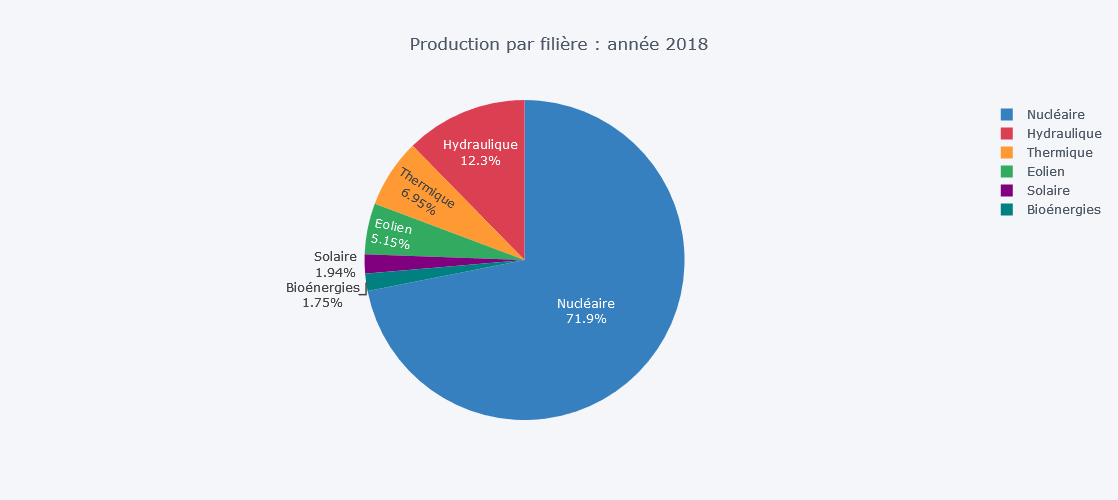

In [13]:
# Choose a year (ex: 2018) and plot the share that each of the different energy sources has in the total energy production:
df_production_2018.sum().to_frame(name="production").reset_index().iplot(
    kind="pie",
    labels="index",
    values="production",
    title="Production par filière : année 2018",
    textinfo='percent+label',
    dimensions=(700,500)
)

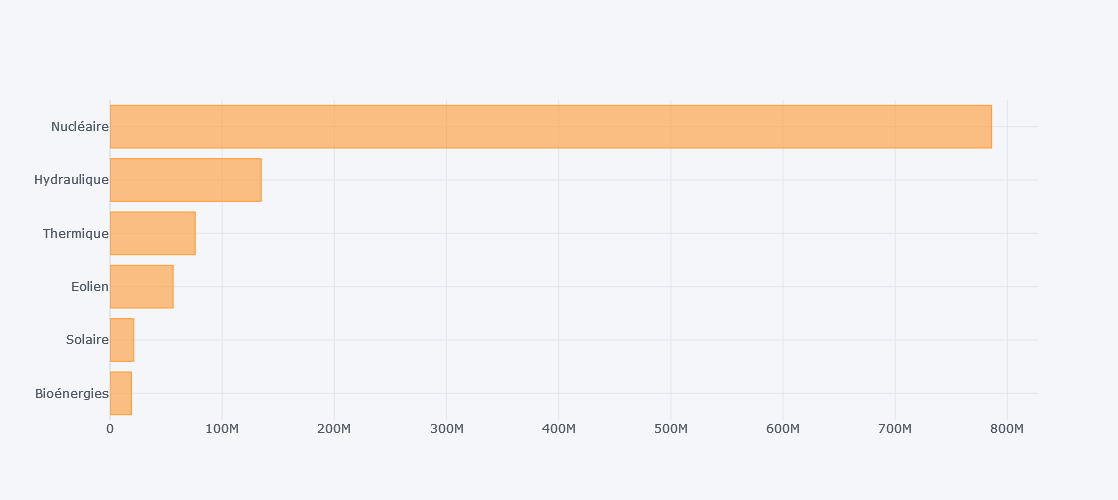

In [14]:
# When thinking about pie charts, give a try to horizontal bars.

df_production_2018.sum().sort_values().iplot(kind="barh", dimensions=(700,500))

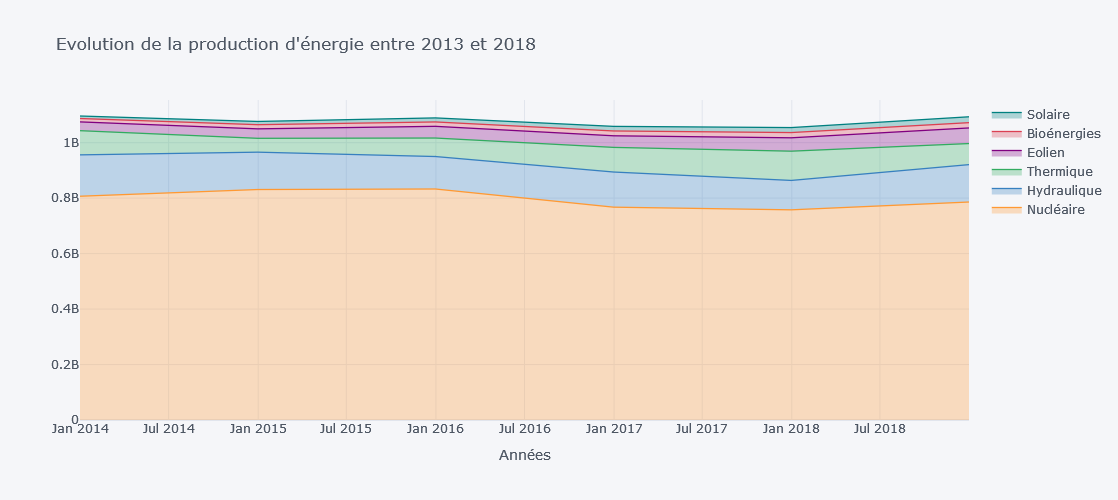

In [16]:
# Explore trends

df_production.iplot(
    kind="area", fill=True,
    title="Evolution de la production d'énergie entre 2013 et 2018",
    xTitle="Années",
    dimensions=(700,500)
)



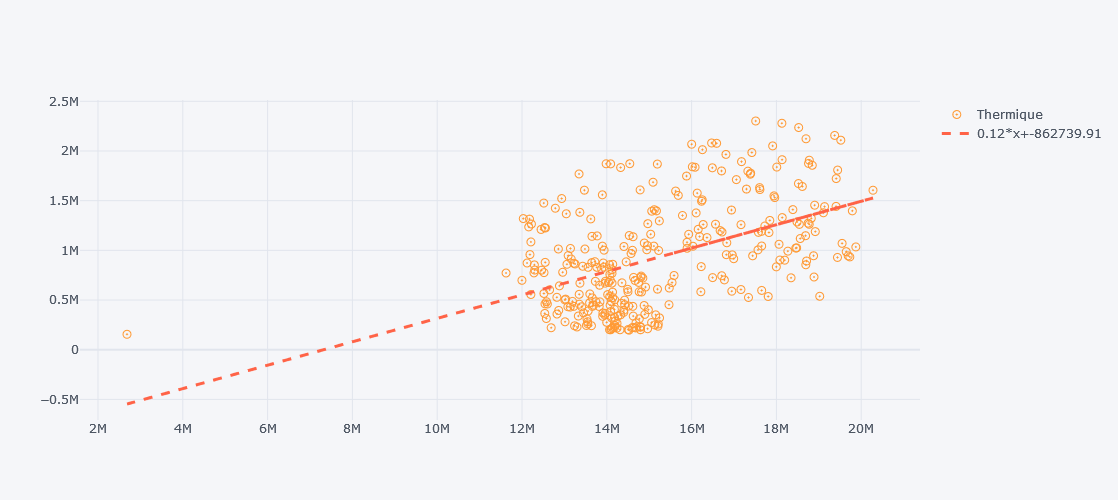

In [17]:
# Explore relationships between variables with a scatter plot

nuclear_vs_thermal.iplot(
    kind="scatter", x=x, y=y,
    mode='markers', colors="orange",  size=8, symbol="circle-open-dot",
    bestfit=True, bestfit_colors=["tomato"],
    dimensions=(700,500)
)